In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, brier_score_loss, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import KFold
import warnings
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = (20, 10)
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Trojan_Detection.csv")
df1.head()
df1.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,177482.000000,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,88740.500000,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,51234.784576,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,44370.250000,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,88740.500000,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,133110.750000,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,177481.000000,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


In [3]:
df = df1.drop(['Flow ID',' Source IP',' Destination IP',' Timestamp'], axis=1)
value_mapping = {'Trojan': 1, 'Benign': 0}
df['Class'] = df['Class'].map(value_mapping)

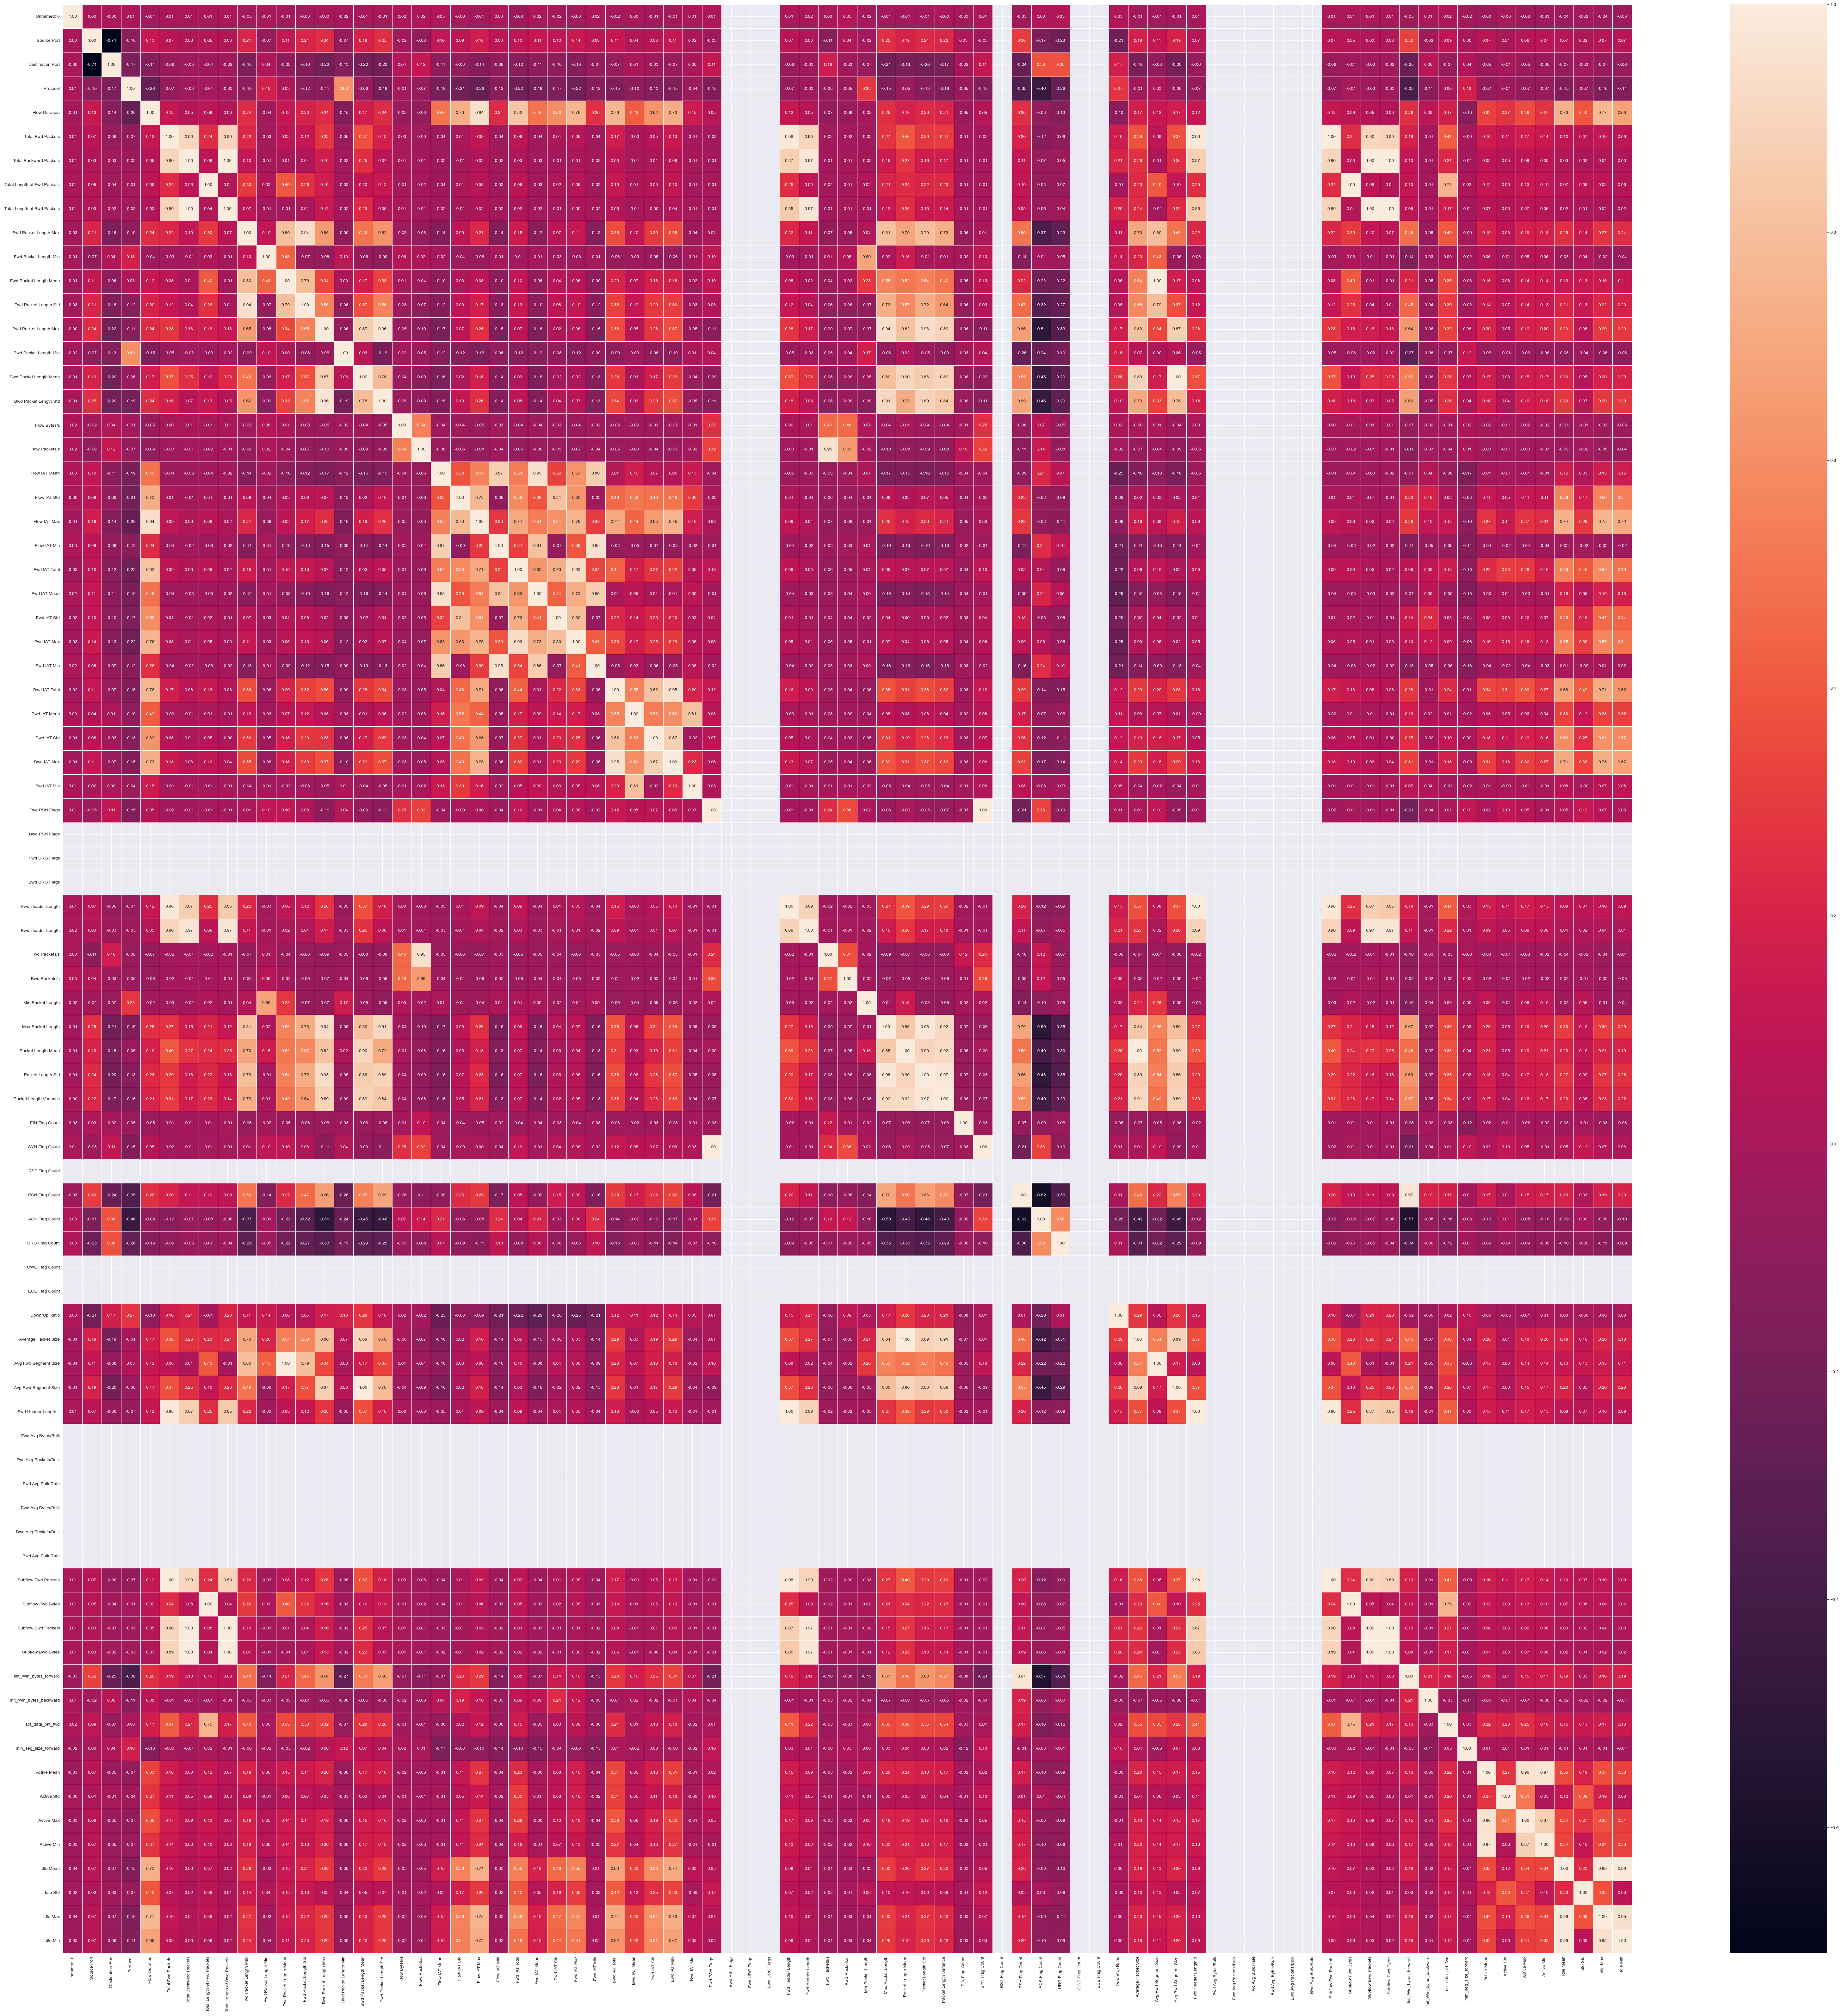

In [4]:
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]
fig, axis = plt.subplots(figsize=(80, 80))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.2f', ax=axis)
plt.show()

In [5]:
correlation_matrix = df.corr()

# Select the correlations of the features with the Class variable
target_correlation = correlation_matrix['Class'].abs()
threshold = 0.04

#feature columns with correlations greater than the threshold
features_to_keep = target_correlation[target_correlation > threshold].index.tolist()

# Drop feature columns with correlations below the threshold
reduced_df = df[features_to_keep]

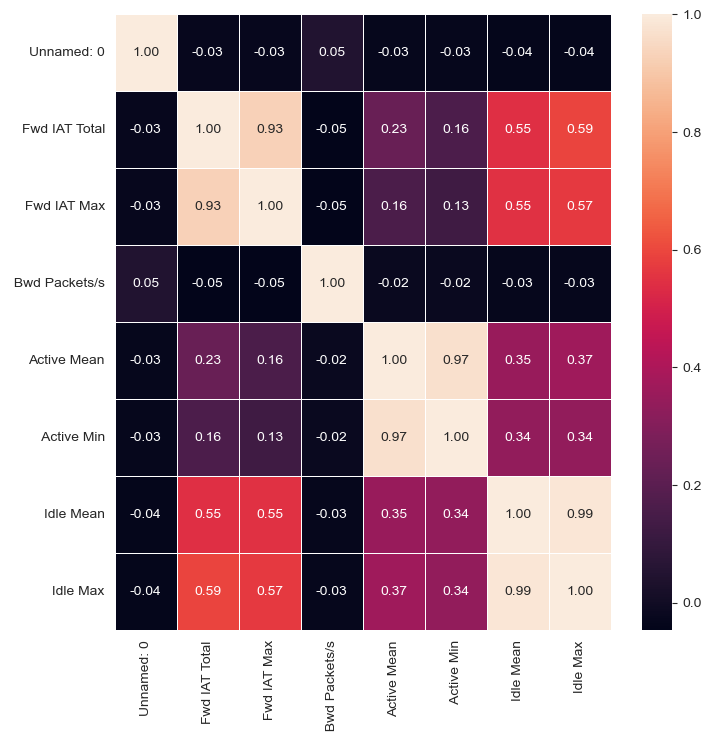

In [6]:
features = reduced_df.iloc[:, :-1]
fig, axis = plt.subplots(figsize=(8, 8))
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.2f', ax=axis)
plt.show()

In [7]:
df = reduced_df

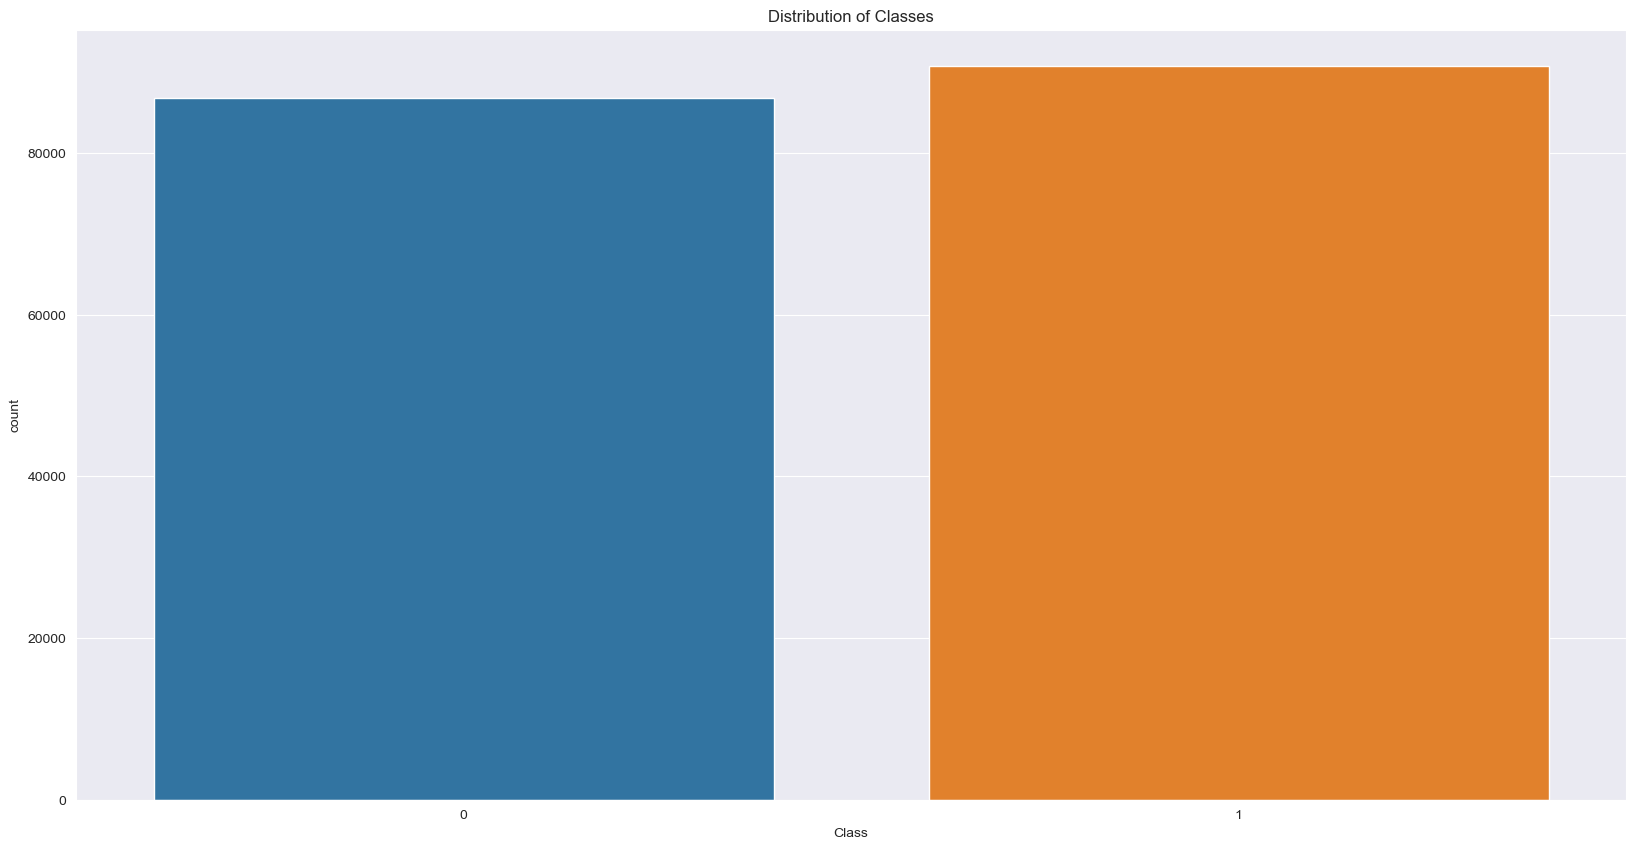

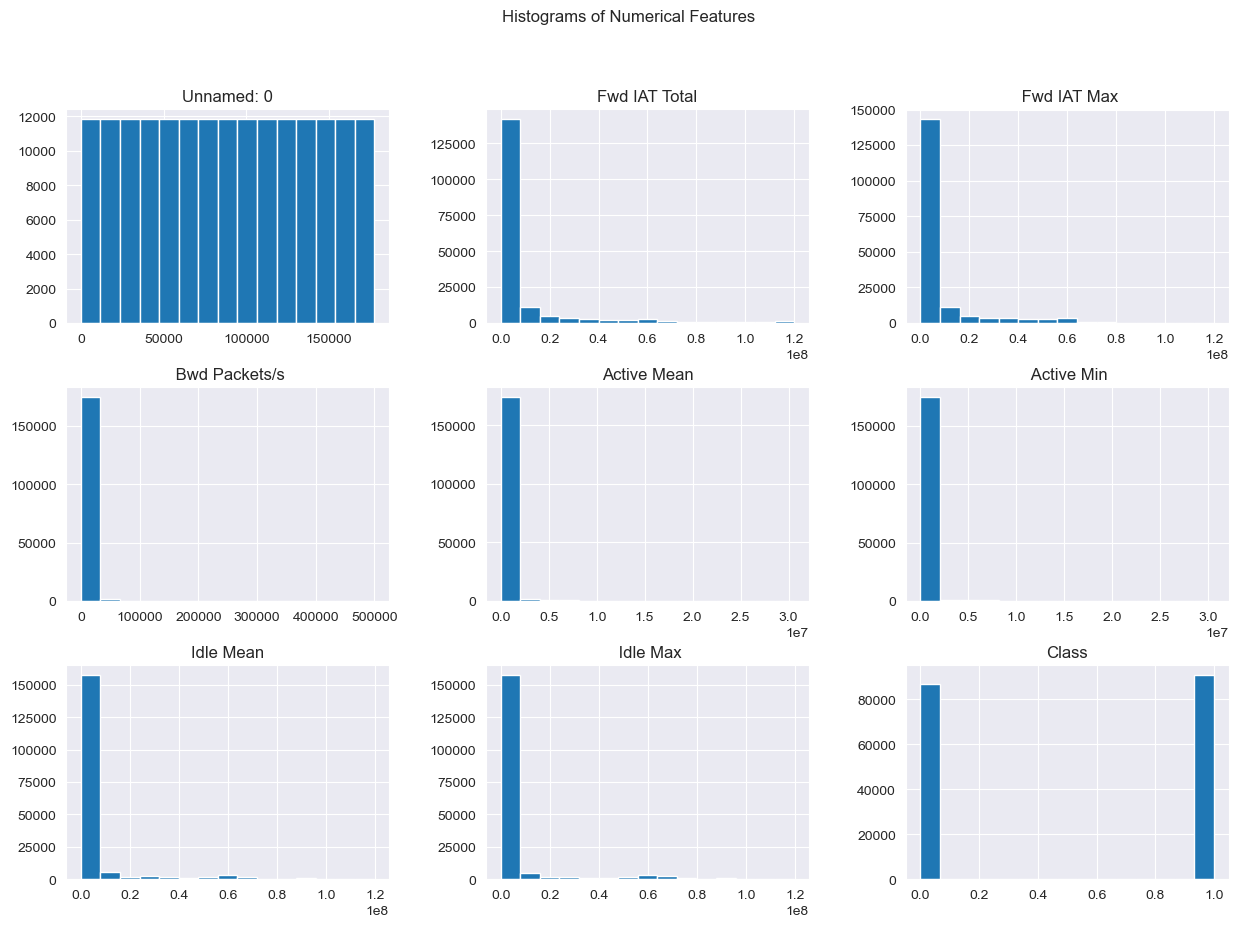

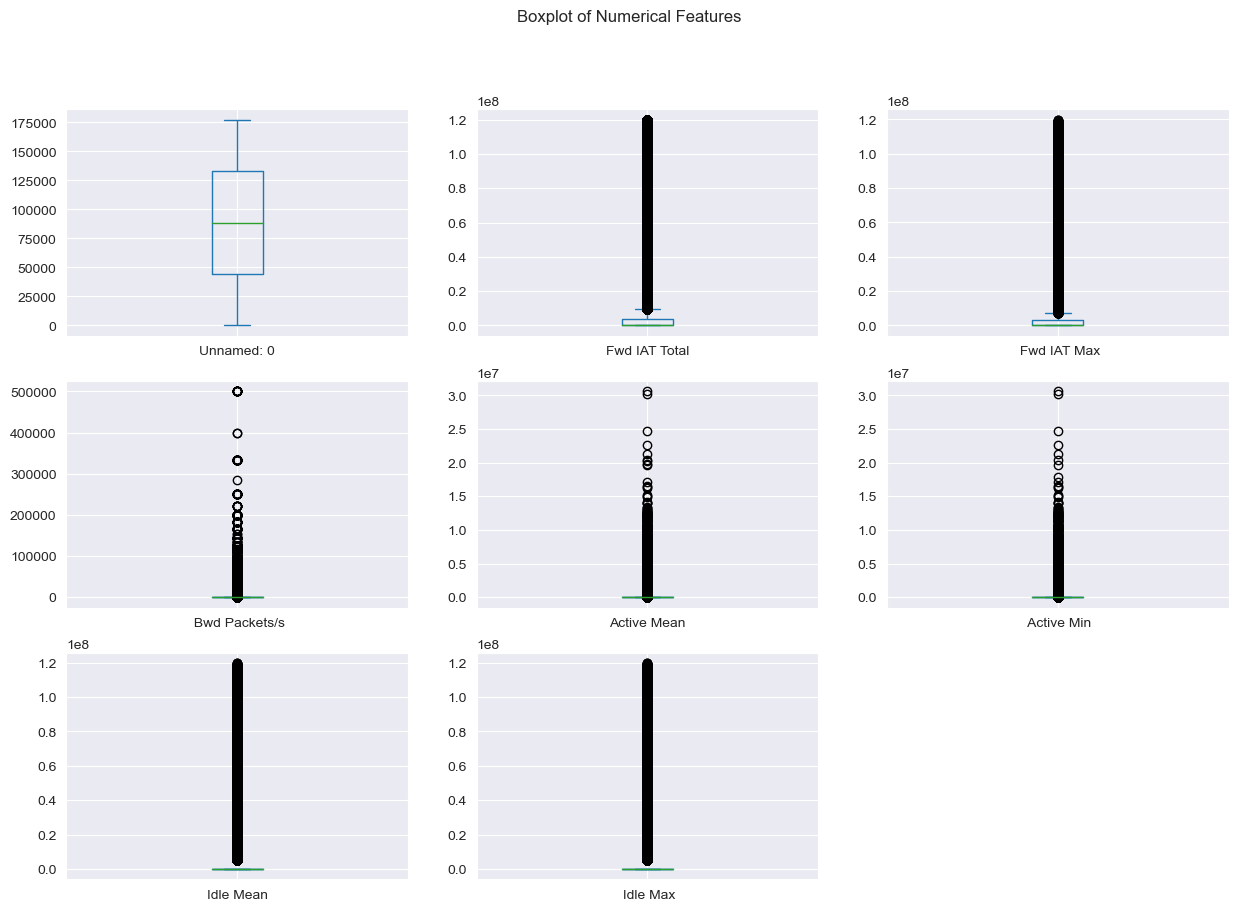

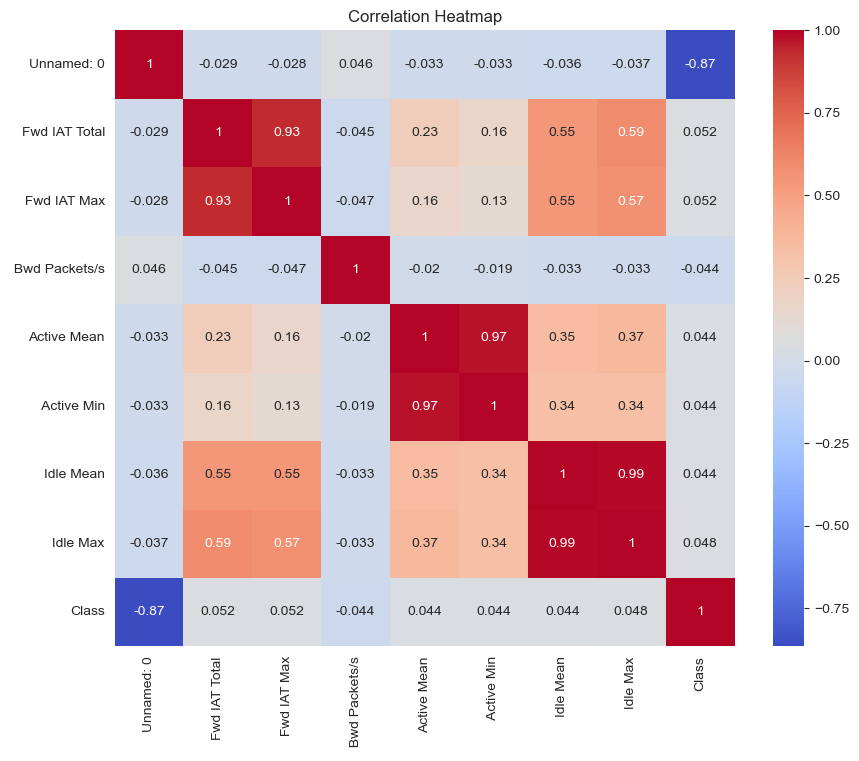

In [35]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.show()

# Histograms for numerical features
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots for numerical features to check for outliers
df.drop(['Class'], axis=1).plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 10))
plt.suptitle("Boxplot of Numerical Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [8]:
features_train_all, features_test_all, labels_train_all, labels_test_all = train_test_split(features, labels, test_size=0.1, random_state=21,
stratify=labels)

In [9]:
for dataset in [features_train_all, features_test_all, labels_train_all,labels_test_all]:
    dataset.reset_index(drop=True, inplace=True)

In [10]:
features_train_all_std = (features_train_all - features_train_all.mean()) / features_train_all.std()
features_test_all_std = (features_test_all - features_test_all.mean()) /features_test_all.std()

In [11]:
features_train_all_std.describe()

,Unnamed: 0,Fwd IAT Total,Fwd IAT Max,Bwd Packets/s,Active Mean,Active Min,Idle Mean,Idle Max
count,1.597330e+05,1.597330e+05,1.597330e+05,1.597330e+05,1.597330e+05,1.597330e+05,1.597330e+05,1.597330e+05
mean,1.277556e-16,-2.931440e-17,4.350452e-17,2.660093e-17,-5.747223e-17,1.316701e-17,1.174355e-16,2.749059e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732450e+00,-4.077067e-01,-4.234892e-01,-1.106286e-01,-1.820008e-01,-1.681398e-01,-2.939970e-01,-3.004225e-01
25%,-8.653843e-01,-4.077067e-01,-4.234892e-01,-1.106286e-01,-1.820008e-01,-1.681398e-01,-2.939970e-01,-3.004225e-01
50%,3.729214e-04,-3.977931e-01,-4.180034e-01,-1.104998e-01,-1.820008e-01,-1.681398e-01,-2.939970e-01,-3.004225e-01
75%,8.659544e-01,-2.144840e-01,-2.367044e-01,-1.088865e-01,-1.820008e-01,-1.681398e-01,-2.939970e-01,-3.004225e-01
max,1.733020e+00,5.621119e+00,7.052410e+00,4.073868e+01,3.901314e+01,4.055625e+01,7.468753e+00,7.059947e+00


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
# train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (141985, 8)
X_test shape:  (35497, 8)


In [15]:
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
 # Number of splits for K-Fold cross-validation
n_splits = 10 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


In [19]:
models_accuracy = []

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_performance_metrics(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    
    TPR = TP / (TP + FN)  
    TNR = TN / (TN + FP)  
    PPV = TP / (TP + FP)  
    NPV = TN / (TN + FN)  
    FPR = FP / (TN + FP)  
    FNR = FN / (TP + FN)  
    FDR = FP / (TP + FP)  
    ACC = (TP + TN) / (TP + FP + FN + TN)  
    F1 = 2 * TP / (2 * TP + FP + FN)  
    BACC = (TPR + TNR) / 2  
    TSS = TPR - FPR  
    HSS = 2 * (TP * TN - FP * FN) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))  
    BS = (FP + FN) / (TP + FP + FN + TN)  
    BSS = 1 - (BS / ((TP + FN) / (TP + TN + FP + FN)))  

    return {
        'Sensitivity': TPR,
        'Specificity': TNR,
        'Precision': PPV,
        'NPV': NPV,
        'FPR': FPR,
        'FNR': FNR,
        'FDR': FDR,
        'Accuracy': ACC,
        'F1': F1,
        'BACC': BACC,
        'TSS': TSS,
        'HSS': HSS,
        'Brier Score': BS,
        'Brier Skill Score': BSS
    }

In [22]:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize KFold and models
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model_list = [KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(n_estimators=100, random_state=42), GaussianNB()]

# Initialize a list to store the models' accuracy for each fold
models_performance_accumulator = []

# Iterate through each fold for cross-validation
for fold_number, (train_indices, test_indices) in enumerate(kf.split(X), 1):
    # Split data into training and test subsets for this fold
    training_features = X.iloc[train_indices]
    test_features = X.iloc[test_indices]
    training_labels = y.iloc[train_indices]
    test_labels = y.iloc[test_indices]

    # Store performance metrics for each model during this fold
    single_fold_performance = []

    for individual_model in model_list:
        individual_model.fit(training_features, training_labels)
        predicted_labels = individual_model.predict(test_features)
        metrics_result = calculate_performance_metrics(test_labels, predicted_labels)
        single_fold_performance.append(metrics_result)
    models_performance_accumulator.append(single_fold_performance)



In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical

number_of_splits = 10
kfold_validator = KFold(n_splits=number_of_splits, shuffle=True, random_state=42)

# List to accumulate the performance metrics for each fold
models_performance_accumulation = []

for fold_number, (train_indices, test_indices) in enumerate(kfold_validator.split(X), 1):
    features_for_training, features_for_testing = X.iloc[train_indices], X.iloc[test_indices]
    labels_for_training, labels_for_testing = y.iloc[train_indices], y.iloc[test_indices]
    features_for_training_reshaped = features_for_training.values.reshape(features_for_training.shape[0], 1, features_for_training.shape[1])
    features_for_testing_reshaped = features_for_testing.values.reshape(features_for_testing.shape[0], 1, features_for_testing.shape[1])
    # Encoding the labels as categorical (one-hot encoding)
    labels_for_training_encoded = to_categorical(labels_for_training)
    labels_for_testing_encoded = to_categorical(labels_for_testing)
    # Create a Sequential model and add bidirectional LSTM layer and dense layer
    lstm_model = Sequential()
    lstm_model.add(Bidirectional(LSTM(units=64, input_shape=(1, features_for_training.shape[1]))))
    lstm_model.add(Dense(labels_for_training_encoded.shape[1], activation='softmax'))
    lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the LSTM model with the training data
    lstm_model.fit(features_for_training_reshaped, labels_for_training_encoded, epochs=10, batch_size=32, verbose=0)
    # Predicting on the test data using the trained model
    predictions_probabilities = lstm_model.predict(features_for_testing_reshaped)
    predictions = np.argmax(predictions_probabilities, axis=-1)
    # Calculate the accuracy and store it in the accumulator
    accuracy_of_model = accuracy_score(labels_for_testing, predictions)
    models_performance_accumulation.append(accuracy_of_model)
mean_accuracy = np.mean(models_performance_accumulation)
print(f"Bidirectional LSTM Model Mean Accuracy across folds: {mean_accuracy}")


555/555 [==============================] - 0s 289us/step
Bidirectional LSTM Model Mean Accuracy across folds: 0.569094379170806


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense

# K-Fold setup
n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store metrics for each model
lstm_metrics_list = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Preparing input for LSTM (assuming features are already scaled/normalized)
    X_train_lstm = np.expand_dims(X_train, axis=-1)  # Adding a dimension for LSTM compatibility
    X_test_lstm = np.expand_dims(X_test, axis=-1)

    # LSTM model setup
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)

    predictions = model.predict(X_test_lstm) > 0.5
    performance_metrics = calculate_performance_metrics(y_test, predictions)
    lstm_metrics_list.append(performance_metrics)


555/555 [==============================] - 0s 537us/step


In [32]:
print(performance_metrics)

{'Sensitivity': 0.532311424790472, 'Specificity': 0.5360599078341014, 'Precision': 0.5451773209848656, 'NPV': 0.5231616820328311, 'FPR': 0.4639400921658986, 'FNR': 0.467688575209528, 'FDR': 0.4548226790151344, 'Accuracy': 0.5341446923597025, 'F1': 0.5386675594241714, 'BACC': 0.5341856663122867, 'TSS': 0.0683713326245734, 'HSS': 0.06833528892993827, 'Brier Score': 0.4658553076402975, 'Brier Skill Score': 0.08822232024702259}


In [43]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.utils import to_categorical

# Initialize models
models = [KNeighborsClassifier(), RandomForestClassifier(), GaussianNB()]

# Adding an LSTM model to the list of models
models.append(Sequential([
    Bidirectional(LSTM(units=64), input_shape=(1, X_train.shape[1])),
    Dense(2, activation='sigmoid')
]))

# Initialize list to store performance metrics for each fold across all models
models_acc = []

for model in models:
    fold_performance_metrics = []
    # Using KFold for splitting
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
        # Data splitting
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if isinstance(model, Sequential):  # If model is LSTM
            # Preparing data for LSTM
            X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
            X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
            y_train_categorical = to_categorical(y_train)
            y_test_categorical = to_categorical(y_test)

            # Compile and fit LSTM model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X_train_lstm, y_train_categorical, epochs=10, batch_size=32, verbose=0)

            # Predicting on test data
            pred_prob = model.predict(X_test_lstm)
            pred = np.argmax(pred_prob, axis=1)

        else:
            # Fit the model on training data and predict on test data
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

        # Calculate performance metrics and append to fold_performance_metrics
        performance_metrics = calculate_performance_metrics(y_test, pred)
        fold_performance_metrics.append(performance_metrics)

        # Print performance metrics for the current iteration
        print(f'Performance Metrics for {type(model).__name__} - Iteration {i}:')
        for metric, value in performance_metrics.items():
            print(f'{metric}: {value}')
        print()

    models_acc.append(fold_performance_metrics)

# Print mean performance metrics for each model across all folds
model_names = ["KNeighborsClassifier", "RandomForestClassifier", "GaussianNB", "Bidirectional LSTM"]
for model_name, fold_performance_metrics in zip(model_names, zip(*models_acc)):
    print(f'{model_name} Mean Performance Metrics:')
    mean_performance_metrics = {metric: sum(p[metric] for p in fold_performance_metrics) / kf.n_splits
                                for metric in fold_performance_metrics[0].keys()}
    for metric, value in mean_performance_metrics.items():
        print(f'{metric}: {value}')
    print()


Performance Metrics for KNeighborsClassifier - Iteration 1:
Accuracy: 0.9483914586737281

Performance Metrics for KNeighborsClassifier - Iteration 2:
Accuracy: 0.9459687869739141

Performance Metrics for KNeighborsClassifier - Iteration 3:
Accuracy: 0.9458530538652242

Performance Metrics for KNeighborsClassifier - Iteration 4:
Accuracy: 0.9438246562993013

Performance Metrics for KNeighborsClassifier - Iteration 5:
Accuracy: 0.94140184809556

Performance Metrics for KNeighborsClassifier - Iteration 6:
Accuracy: 0.945796709488393

Performance Metrics for KNeighborsClassifier - Iteration 7:
Accuracy: 0.9455149876042371

Performance Metrics for KNeighborsClassifier - Iteration 8:
Accuracy: 0.9462474645030426

Performance Metrics for KNeighborsClassifier - Iteration 9:
Accuracy: 0.9428668018931711

Performance Metrics for KNeighborsClassifier - Iteration 10:
Accuracy: 0.9432612125309894

Performance Metrics for RandomForestClassifier - Iteration 1:
Accuracy: 1.0

Performance Metrics for R

TypeError: object of type 'generator' has no len()

In [ ]:
# Print mean performance metrics for each model across all folds
model_names = ["KNeighborsClassifier", "RandomForestClassifier", "GaussianNB", "Bidirectional LSTM"]
for model_name, fold_performance_metrics in zip(model_names, zip(*models_acc)):
    print(f'{model_name} Mean Performance Metrics:')
    mean_performance_metrics = {metric: sum(p[metric] for p in fold_performance_metrics) / kf.n_splits
                                for metric in fold_performance_metrics[0].keys()}
    for metric, value in mean_performance_metrics.items():
        print(f'{metric}: {value}')
    print()


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

# Define a function to calculate additional performance metrics
def calculate_performance_metrics(y_true, y_pred):
    # Assuming some function exists that returns a dictionary of metrics
    return {
        'Accuracy': accuracy_score(y_true, y_pred)
    }

# Initialize models with various types including LSTM
models = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    Sequential([
        Bidirectional(LSTM(units=64), input_shape=(1, X_train.shape[1])),
        Dense(2, activation='softmax')
    ])
]

# List to accumulate DataFrame of metrics for each model
models_dfs = []

# KFold setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Process each model
for model in models:
    # Store each fold's metrics
    model_metrics = []

    # Iterate through each fold
    for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
        # Data splitting
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Prepare data for LSTM or fit other models
        if isinstance(model, Sequential):
            # LSTM requires reshaping of data
            X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
            X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
            y_train_categorical = to_categorical(y_train)
            y_test_categorical = to_categorical(y_test)

            # Fit and compile LSTM model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X_train_lstm, y_train_categorical, epochs=10, batch_size=32, verbose=0)
            pred_prob = model.predict(X_test_lstm)
            pred = np.argmax(pred_prob, axis=1)
        else:
            # Train and predict with non-LSTM models
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

        # Calculate and append performance metrics
        metrics = calculate_performance_metrics(y_test, pred)
        model_metrics.append(metrics)

    # Convert metrics to DataFrame and store
    model_metrics_df = pd.DataFrame(model_metrics)
    models_dfs.append(model_metrics_df)

# Display metrics DataFrames for each model
model_names = ["KNeighborsClassifier", "RandomForestClassifier", "GaussianNB", "Bidirectional LSTM"]
for model_name, df in zip(model_names, models_dfs):
    print(f'Metrics for {model_name}:')
    print(df)
    print()


555/555 [==============================] - 0s 294us/step
Metrics for KNeighborsClassifier:
   Accuracy
0  0.948391
1  0.945969
2  0.945853
3  0.943825
4  0.941402
5  0.945797
6  0.945515
7  0.946247
8  0.942867
9  0.943261

Metrics for RandomForestClassifier:
   Accuracy
0  1.000000
1  1.000000
2  0.999944
3  1.000000
4  1.000000
5  1.000000
6  1.000000
7  0.999944
8  1.000000
9  1.000000

Metrics for GaussianNB:
   Accuracy
0  0.953800
1  0.956955
2  0.954361
3  0.952445
4  0.955939
5  0.953403
6  0.955657
7  0.954530
8  0.954586
9  0.951375

Metrics for Bidirectional LSTM:
   Accuracy
0  0.566173
1  0.564764
2  0.581418
3  0.546033
4  0.539554
5  0.562261
6  0.558035
7  0.527102
8  0.561415
9  0.543103

